# Life satisfaction and GDP per capita
---
## Life satisfaction
---
### Source
This dataset was obtained from the OECD's website at: http://stats.oecd.org/index.aspx?DataSetCode=BLI

### Data description
---
    Int64Index: 3292 entries, 0 to 3291
    Data columns (total 17 columns):
    ﻿"LOCATION"              3292 non-null object
    Country                  3292 non-null object
    INDICATOR                3292 non-null object
    Indicator                3292 non-null object
    MEASURE                  3292 non-null object
    Measure                  3292 non-null object
    INEQUALITY               3292 non-null object
    Inequality               3292 non-null object
    Unit Code                3292 non-null object
    Unit                     3292 non-null object
    PowerCode Code           3292 non-null int64
    PowerCode                3292 non-null object
    Reference Period Code    0 non-null float64
    Reference Period         0 non-null float64
    Value                    3292 non-null float64
    Flag Codes               1120 non-null object
    Flags                    1120 non-null object
    dtypes: float64(3), int64(1), object(13)
    memory usage: 462.9+ KB

### Example usage using python Pandas
---
    >>> life_sat = pd.read_csv("oecd_bli_2015.csv", thousands=',')
    
    >>> life_sat_total = life_sat[life_sat["INEQUALITY"]=="TOT"]
    
    >>> life_sat_total = life_sat_total.pivot(index="Country", columns="Indicator", values="Value")
    
    >>> life_sat_total.info()
    <class 'pandas.core.frame.DataFrame'>
    
- Index: 37 entries, Australia to United States
- Data columns (total 24 columns):
- Air pollution                                37 non-null float64
- Assault rate                                 37 non-null float64
- Consultation on rule-making                  37 non-null float64
- Dwellings without basic facilities           37 non-null float64
- Educational attainment                       37 non-null float64
- Employees working very long hours            37 non-null float64
- Employment rate                              37 non-null float64
- Homicide rate                                37 non-null float64
- Household net adjusted disposable income     37 non-null float64
- Household net financial wealth               37 non-null float64
- Housing expenditure                          37 non-null float64
- Job security                                 37 non-null float64
- Life expectancy                              37 non-null float64
- Life satisfaction                            37 non-null float64
- Long-term unemployment rate                  37 non-null float64
- Personal earnings                            37 non-null float64
- Quality of support network                   37 non-null float64
- Rooms per person                             37 non-null float64
- Self-reported health                         37 non-null float64
- Student skills                               37 non-null float64
- Time devoted to leisure and personal care    37 non-null float64
- Voter turnout                                37 non-null float64
- Water quality                                37 non-null float64
- Years in education                           37 non-null float64
- dtypes: float64(24)
- memory usage: 7.2+ KB

## GDP per capita
---
### Source
Dataset obtained from the IMF's website at: http://goo.gl/j1MSKe

### Data description
---
- Int64Index: 190 entries, 0 to 189
- Data columns (total 7 columns):
- Country                          190 non-null object
- Subject Descriptor               189 non-null object
- Units                            189 non-null object
- Scale                            189 non-null object
- Country/Series-specific Notes    188 non-null object
- 2015                             187 non-null float64
- Estimates Start After            188 non-null float64
- dtypes: float64(2), object(5)
- memory usage: 11.9+ KB

### Example usage using python Pandas

    >>> gdp_per_capita = pd.read_csv(
    ...     datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
    ...     encoding='latin1', na_values="n/a", index_col="Country")
    ...
    >>> gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)



---
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model
import numpy as np

### Merge the OECD's life satisfaction data and the IMF's GDP per capita data

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY']=='TOT']
    oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
    gdp_per_capita.rename(columns={'2015': 'GDP per capita'}, inplace=True)
    gdp_per_capita.set_index('Country', inplace=True)
    
    # Join
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    
    # Sort
    full_country_stats.sort_values(by='GDP per capita', inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

In [3]:
FOLDER_PATH = 'data/'

# Load data
oecd_data = pd.read_csv(FOLDER_PATH + '38-oecd-bli.csv', thousands=',')
gdp_data = pd.read_csv(FOLDER_PATH + '38-gdp.csv', thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

In [4]:
# Prep
country_stats = prepare_country_stats(oecd_data, gdp_data)
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [5]:
x = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

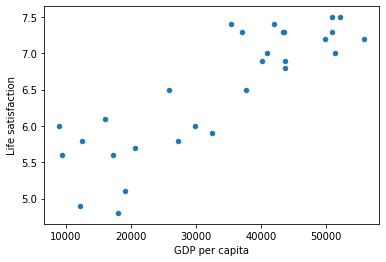

In [6]:
# Visualize the data
country_stats.plot(kind='scatter',
                   x='GDP per capita',
                   y='Life satisfaction')
plt.show()

In [7]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(x, y)

# Prediction
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new))

[[5.96242338]]


---
---

In [8]:
oecd_data.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [9]:
# Life satisfaction data
oecd_data = oecd_data[oecd_data['INEQUALITY']=='TOT']
oecd_data = oecd_data.pivot(index='Country', columns='Indicator', values='Value')
oecd_data.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [10]:
gdp_data.rename(columns={'2015': 'GDP per capita'}, inplace=True)
gdp_data.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [11]:
# Join data
full_country_stats = pd.merge(left=oecd_data, right=gdp_data,
                              left_index=True, right_index=True)
full_country_stats.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,14.41,93.0,91.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,14.46,75.0,94.0,17.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,15.71,89.0,87.0,18.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",40106.632,2014.0
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,14.25,61.0,91.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43331.961,2015.0


In [12]:
# United States
full_country_stats[['GDP per capita', 'Life satisfaction']].loc['United States']

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [13]:
# Remove data
remove_indices = [1, 6, 8, 33, 34]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[remove_indices]

In [14]:
sample_data.shape

(31, 2)

In [15]:
missing_data.shape

(5, 2)

In [16]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Austria,43724.031,6.9
Czech Republic,17256.918,6.5
Estonia,17288.083,5.6
Turkey,9437.372,5.6
United Kingdom,43770.688,6.8


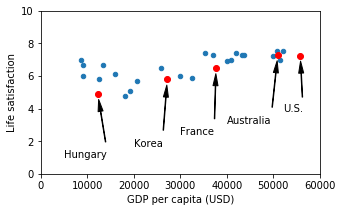

In [17]:
# Plot country capita per life satisfaction
sample_data.plot(kind='scatter',
                 x='GDP per capita',
                 y='Life satisfaction',
                 figsize=(5,3))

plt.axis([0, 60000, 0, 10])
position_text = {
    'Hungary': (5000, 1),
    'Korea': (20000, 1.7),
    'France': (30000, 2.4),
    'Australia': (40000, 3.1),
    'United States': (52000, 3.8),
}

# Loop through list
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = 'U.S.' if country == 'United States' else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, 'ro')
    
# Plot feature    
plt.xlabel('GDP per capita (USD)')
# save_fig('money_happy_scatterplot')
plt.show()

In [18]:
position_text

{'Hungary': (5000, 1),
 'Korea': (20000, 1.7),
 'France': (30000, 2.4),
 'Australia': (40000, 3.1),
 'United States': (52000, 3.8)}

In [19]:
position_text.keys()

dict_keys(['Hungary', 'Korea', 'France', 'Australia', 'United States'])

In [20]:
# Table
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


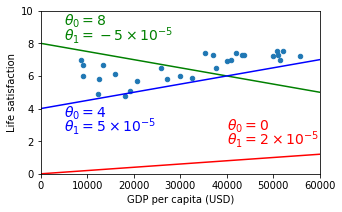

In [21]:
# Linear plot
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5,3))
plt.xlabel('GDP per capita (USD)')
plt.axis([0, 60000, 0, 10])

# Plot lines
X = np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, 'r')
plt.text(40000, 2.7, r'$\theta_0 = 0$', fontsize=14, color='r')
plt.text(40000, 1.8, r'$\theta_1 = 2 \times 10^{-5}$', fontsize=14, color='r')
         
# Green
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r'$\theta_0 = 8$', fontsize=14, color='g')
plt.text(5000, 8.2, r'$\theta_1 = -5 \times 10^{-5}$', fontsize=14, color='g')
         
# Blue
plt.plot(X, 4 + 5*X/100000, 'b')
plt.text(5000, 3.5, r'$\theta_0 = 4$', fontsize=14, color='b')
plt.text(5000, 2.6, r'$\theta_1 = 5 \times 10^{-5}$', fontsize=14, color='b')
# save_fig('tweaking_model_params_plot')
plt.show()

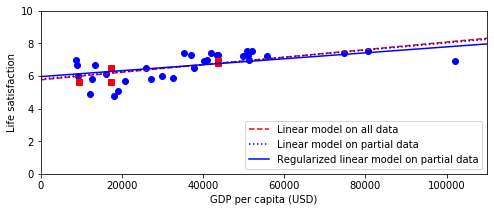

In [22]:
lin1 = sklearn.linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

lin_reg_full = sklearn.linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]

plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

ridge = sklearn.linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")
plt.show()